In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from multiprocessing import Pool

import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from utils.pre_processing import tokenizer, html_to_text
from utils.model import add_bigram, create_dictionary, create_corpus
from utils.model import ModelLDA, calc_coherence

In [3]:
df = pd.read_feather('scielo_dataset.feather')

In [4]:
with Pool() as pool:
    # limpa o html dos textos.
    textos = list(tqdm(pool.imap(html_to_text, df['texto_html']), total=len(df)))
    
with Pool() as pool:
    # tokeniza e lemmetiza os textos.
    documentos = list(tqdm(pool.imap(tokenizer, textos), total=len(textos)))

  0%|          | 0/1664 [00:00<?, ?it/s]

  0%|          | 0/1664 [00:00<?, ?it/s]

In [5]:
new_documentos = documentos.copy()

In [6]:
add_bigram(new_documentos, min_count=15)
dicionario = create_dictionary(new_documentos, n_abaixo=30, n_acima=0.5)
corpus = create_corpus(dicionario, new_documentos, use_tfidf=False)

In [24]:
results = []

In [25]:
for i in tqdm((10, 100, 200, 300, 400)):
    for p in tqdm((1, 5, 10, 25, 50)):
        lda = ModelLDA(corpus, dicionario, chunksize=2000, iterations=i, passes=p)
        model = lda.run(12)

        coerencia = calc_coherence(model, new_documentos, dicionario, corpus, method='c_v')
        co = coerencia.get_coherence()
        
        results.append({'it': i, 'pa':p , 'co':co})

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [27]:
max(results, key = lambda x: x['co'])

{'it': 400, 'pa': 50, 'co': 0.6137001539282075}

In [30]:
it = [r['it']for r in results]
pa = [r['pa']for r in results]
co  = [r['co'] for r in results]

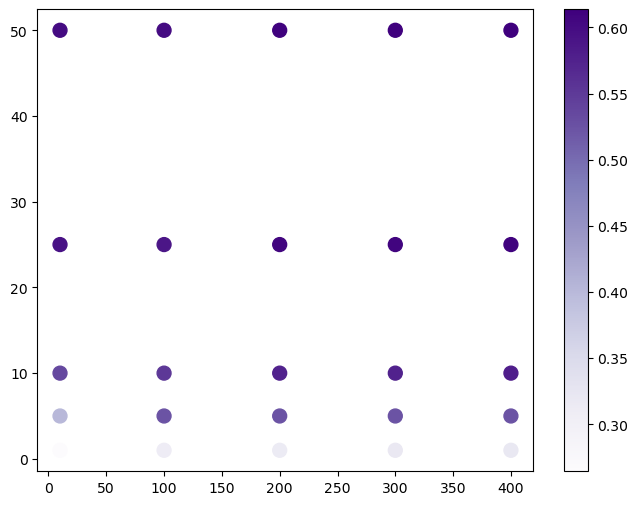

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(it, pa, c=co, cmap='Purples', s=100)
plt.colorbar()

plt.show()

In [42]:
sorted(results, key=lambda x: x['co'], reverse=True)

[{'it': 400, 'pa': 50, 'co': 0.6137001539282075},
 {'it': 300, 'pa': 50, 'co': 0.6120661777536435},
 {'it': 200, 'pa': 50, 'co': 0.6107138271210043},
 {'it': 400, 'pa': 25, 'co': 0.6096889701765897},
 {'it': 300, 'pa': 25, 'co': 0.6091780716928957},
 {'it': 200, 'pa': 25, 'co': 0.6081580775786162},
 {'it': 100, 'pa': 50, 'co': 0.601395018122698},
 {'it': 10, 'pa': 50, 'co': 0.6010188318067402},
 {'it': 10, 'pa': 25, 'co': 0.5939981706163221},
 {'it': 100, 'pa': 25, 'co': 0.5887569026590865},
 {'it': 400, 'pa': 10, 'co': 0.5808252472002474},
 {'it': 300, 'pa': 10, 'co': 0.5746964536410615},
 {'it': 200, 'pa': 10, 'co': 0.5744542727182332},
 {'it': 100, 'pa': 10, 'co': 0.5512325647644273},
 {'it': 10, 'pa': 10, 'co': 0.5354015087127404},
 {'it': 100, 'pa': 5, 'co': 0.5245373691496937},
 {'it': 200, 'pa': 5, 'co': 0.5245148889817193},
 {'it': 300, 'pa': 5, 'co': 0.5245007963903296},
 {'it': 400, 'pa': 5, 'co': 0.5237287112200979},
 {'it': 10, 'pa': 5, 'co': 0.40141764627312054},
 {'it': 4

In [61]:
results = []

In [ ]:
for bi in tqdm((15, 10)):
    for a in tqdm((20, 30)):
        for b in tqdm((0.4, 0.5, 0.6)):
            new_documentos = documentos.copy()
            add_bigram(new_documentos, min_count=bi)
            dicionario = create_dictionary(new_documentos, n_abaixo=a, n_acima=b)
            corpus = create_corpus(dicionario, new_documentos, use_tfidf=False)

            lda = ModelLDA(corpus, dicionario, chunksize=2000, iterations=400, passes=50)
            model = lda.run(12)
    
            coerencia = calc_coherence(model, new_documentos, dicionario, corpus, method='c_v')
            co = coerencia.get_coherence()
            
            results.append({'bi': bi, 'a':a, 'b':b , 'co':co})
                

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x7fb3267108b0>
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.9/site-packages/tqdm/std.py", line 1149, in __del__
    self.close()
  File "/opt/miniconda3/lib/python3.9/site-packages/tqdm/notebook.py", line 281, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


In [ ]:
max(results, key = lambda x: x['co'])

In [ ]:
sorted(results, key=lambda x: x['co'], reverse=True)